<a href="https://colab.research.google.com/github/ryo-k2mt/ML-DL-study/blob/main/LSTM%E3%81%AE%E5%AE%9F%E8%A3%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

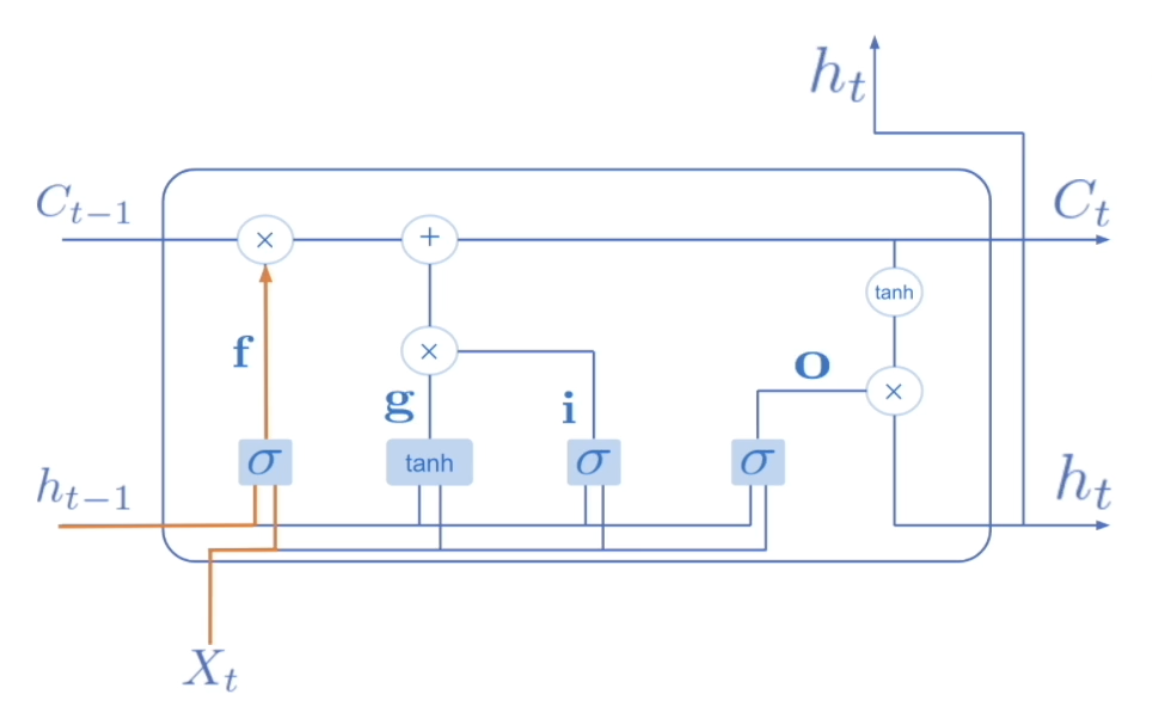

In [ ]:
import numpy as np

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
# 初期値の設定
N = 32
T = 16
D = 100
H = 100

 ### foget gate の算出

$$
f_{t} = \sigma(x_{t}W^{(f)}_{x} + h_{t-1}W^{(f)}_{h} + b^{(f)})
$$

In [ ]:
# 入力変数の定義
xs = np.random.rand(N, T, D)

# f の算出で用いる h の重みの定義
Wh_f = np.random.rand(H, H)

# f の算出で用いる x の重みの定義
Wx_f = np.random.rand(D, H)

# f の算出で用いる b の定義
b_f = np.random.rand(N, H)

# 隠れ状態と記憶セルの初期値の設定
h_prev = np.zeros((N, H))
c_prev = np.zeros((N, H))

In [ ]:
x = xs[:, 0, :]

In [ ]:
# sigmoid 関数を通すことで、どれだけ情報を通すかを設定できる。
f = sigmoid(np.dot(x, Wx_f) + np.dot(h_prev, Wh_f) + b_f)

In [ ]:
f

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

### input gate の算出

重みとバイアスの値が変わるだけで、計算式は forget gate と変わらない
$$
f_{t} = \sigma(x_{t}W^{(i)}_{x} + h_{t-1}W^{(i)}_{h} + b^{(i)})
$$

In [ ]:
# i の算出で用いる h の重みの定義
Wh_i = np.random.rand(H, H)

# i の算出で用いる x の重みの定義
Wx_i = np.random.rand(D, H)

# i の算出で用いる b の定義
b_i = np.random.rand(N, H)

In [ ]:
i = sigmoid(np.dot(x, Wx_i) + np.dot(h_prev, Wh_i) + b_i)

In [ ]:
i

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.99999999, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

### g の算出

活性化関数と重み、バイアスが変化しただけで、 input gate と forget gate を中身は変わらない。
$$
g_{t} = \tanh(x_{t}W^{(g)}_{x} + h_{t-1}W^{(g)}_{h} + b^{(g)})
$$

In [ ]:
Wx_g = np.random.rand(D, H)
Wh_g = np.random.rand(H, H)
b_g = np.random.rand(N, H)

In [ ]:
g = np.tanh(np.dot(x, Wx_g) + np.dot(h_prev, Wh_g) + b_g)

### 記憶セルの算出

$$
Ct = f_{t} \odot C_{t-1} + i_{t} \odot g_{t}
$$



In [ ]:
c_next = f * c_prev + i * g

### output gate の計算

$$
O = \sigma(x_{t}W^{(o)}_{x} + h_{t-1}W^{(fo}_{h} + b^{(o)})
$$

In [ ]:
Wh_o = np.random.rand(H, H)
Wx_o = np.random.rand(D, H)
b_o = np.random.rand(N, H)

o = sigmoid(np.dot(x, Wx_o) + np.dot(h_prev, Wh_o) + b_o)

### 次の隠れ状態の計算

In [ ]:
h_next = o * np.tanh(c_next)